### *Question 1 Part 1*

In [249]:
#import commands
import numpy as np
import matplotlib.pyplot as plt

#Defining constants
C_alpha = 20000
m = 1888.6
l_f = 1.55
l_r = 1.39
I_z = 25854


In [250]:
#Checking the controllability and observability of lateral controllor

x_dots = [2,5,8]

for x_dot in x_dots:
    A_lat = np.array([[0,1,0,0],
              [0,(-4*C_alpha/(m*v)),(4*C_alpha/m),(-2*C_alpha*(l_f -l_r)/(m*v))],
              [0,0,0,1],
              [0,(-2*C_alpha*(l_f - l_r)/(I_z*v)),(2*C_alpha*(l_f - l_r)/I_z),(-2*C_alpha*(l_f**2 + l_r**2)/(I_z*v))]])
    B_lat = np.array([[0,0],
              [(2*C_alpha/m),0],
              [0,0],
              [(2*C_alpha*l_f/I_z),0]])
    
    C_lat = np.array([[1,0,0,0],
                  [0,1,0,0],
                  [0,0,1,0],
                  [0,0,0,1]])
    A_sq_lat = A_lat@A_lat
    A_cube_lat = A_sq_lat@A_lat
    
    P_lat = np.hstack([B_lat, A_lat@B_lat, A_sq_lat@B_lat, A_cube_lat@B_lat])
    Q_lat = np.vstack([C_lat, C_lat@A_lat, C_lat@A_sq_lat, C_lat@A_cube_lat])

    R_c = np.linalg.matrix_rank(P_lat)
    R_o = np.linalg.matrix_rank(Q_lat)
    
    if(R_c == A_lat.shape[0]):
        print(f'The system at velocity {x_dot}m/s is Controllable')
    else:
        print(f'The system at velocity {x_dot}m/s is not Controllable')
        
    if(R_o == A_lat.shape[0]):
        print(f'The system at velocity {x_dot}m/s is Observable \n')
    else:
        print(f'The system at velocity {x_dot}m/s is not Observable \n')

The system at velocity 2m/s is Controllable
The system at velocity 2m/s is Observable 

The system at velocity 5m/s is Controllable
The system at velocity 5m/s is Observable 

The system at velocity 8m/s is Controllable
The system at velocity 8m/s is Observable 



### *Question 1 Part 2*

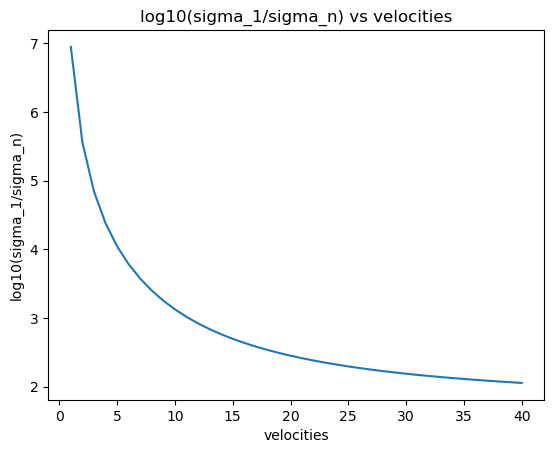

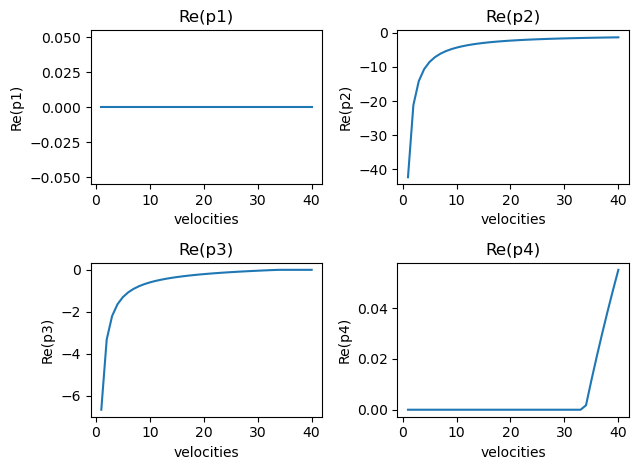

In [254]:
#Forming the graphs
velocities = np.arange(1,41)

singular_ratio = []
poles = np.zeros((4,40))

for v in velocities:
    A_lat = np.array([[0,1,0,0],
              [0,(-4*C_alpha/(m*v)),(4*C_alpha/m),(-2*C_alpha*(l_f -l_r)/(m*v))],
              [0,0,0,1],
              [0,(-2*C_alpha*(l_f - l_r)/(I_z*v)),(2*C_alpha*(l_f - l_r)/I_z),(-2*C_alpha*(l_f**2 + l_r**2)/(I_z*v))]])
    
    
    B_lat = np.array([[0,0],
              [(2*C_alpha/m),0],
              [0,0],
              [(2*C_alpha*l_f/I_z),0]])
    
    A_sq_lat = A_lat@A_lat
    A_cube_lat = A_sq_lat@A_lat
    
    P_lat = np.hstack([B_lat, A_lat@B_lat, A_sq_lat@B_lat, A_cube_lat@B_lat])
    
    #Singular ratio calculation
    singular_values = np.linalg.svd(P_lat, compute_uv = False)
    singular_ratio.append(np.log10(singular_values[0]/singular_values[-1]))
    
    #Poles calculation
    eig_values = np.linalg.eig(A_lat)[0]
    poles[:,v-1] = eig_values.real


#Graph for singular values
plt.figure()
plt.plot(velocities, singular_ratio)
plt.ylabel("log10(sigma_1/sigma_n)")
plt.xlabel("velocities")
plt.title("log10(sigma_1/sigma_n) vs velocities")
plt.show()

#Graph for real part of poles
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(velocities,poles[i,:])
    plt.title(f'Re(p{i+1})')
    plt.xlabel("velocities")
    plt.ylabel(f'Re(p{i+1})')
    
plt.tight_layout()  
plt.show()

## *Conclusions*

#### In the graph of log10(sigma_1/sigma_n vs velocities the log10(sigma_1/sigma_n) decreases as velocity increases it shows that the controllability of the system reduces as the velcoities increase.

#### In the graph of poles vs velocities, all poles show different behaviour. Pole 1 remains constant at 0 which says that the system is marginally stable and show oscillatory behavior. pole 2 and 3 start at negative values and then increase till 0 where it remains constant which shows that the system is stable under most velocities and then it becomes marginally stable. Pole 4 remains contsant at 0 and then increases as velocity decreases which shows that it becomes less stable as velocity decreases. Overall, the system is marginally stable. As the velcoities increases, the stability decreases and is unstable when most of the poles are near 0. 